In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 2. Работа с массивами NumPy

**N. Все упражнения ниже нужно делать без использования циклов Python**

**2.1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [12]:
a = np.arange(1,21)
ans = np.ones(20)*2
ans = (ans**a)/a
ans

array([2.00000000e+00, 2.00000000e+00, 2.66666667e+00, 4.00000000e+00,
       6.40000000e+00, 1.06666667e+01, 1.82857143e+01, 3.20000000e+01,
       5.68888889e+01, 1.02400000e+02, 1.86181818e+02, 3.41333333e+02,
       6.30153846e+02, 1.17028571e+03, 2.18453333e+03, 4.09600000e+03,
       7.71011765e+03, 1.45635556e+04, 2.75941053e+04, 5.24288000e+04])

**2.2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [17]:
a = np.arange(0,6)
print(a)
q1 = np.ones(6)*0.1
q2 = np.ones(6)*0.2
(q1**(3*a)*q2**(4*a)).sum()

[0 1 2 3 4 5]


1.00000160000256

**2.3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [37]:
q = np.zeros((8,8))
a = np.arange(1,9)
b = np.arange(1,9).reshape(-1,1)
q+((a+b)%2)

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

**2.4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

In [65]:
X = np.random.random((5, 2))

r =((X[:,0]**2+X[:,1]**2)**(1/2)).reshape(-1,1)
X,r
phi = np.arctan(X[:,1] / X[:,0]).reshape(-1,1)
ans = np.hstack((r,phi))
ans

array([[1.0153343 , 1.32954009],
       [1.05146848, 0.74330246],
       [0.22389129, 1.43220953],
       [0.47404721, 0.09370615],
       [0.2457611 , 0.78681016]])

**2.5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [73]:
X = np.random.random((10, 10))

np.unravel_index(np.argmax(X, axis=None), X.shape)

(7, 6)

**2.6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

In [81]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))

X[np.argmin(((X[:,0]-y[:,0])**2 + (X[:,1]-y[:,1])**2)**(1/2))]

array([0.13070331, 0.9049654 ])

**2.7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте массив из её значений на  $-3 \le x \le 3$.

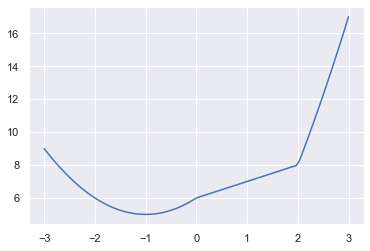

In [100]:
x = np.linspace(-3,3,100)
y = np.copy(x)
y[x < 0] = y[x < 0]**2 + 2*y[x < 0] + 6
y[(x < 2) & (x >= 0)] = y[(x < 2) & (x >= 0)] + 6
y[x >= 2] = y[x >= 2]**2 + 4*y[x >= 2] - 4

sns.set()
plt.plot(x,y)


**2.8** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [108]:
X = np.random.random((10, 10))

mean = (np.mean(X,axis = 1)).reshape(-1,1)
ans = X - mean

**2.9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

In [109]:
X = np.random.normal(loc=5, scale=2., size=1000)

print(np.mean(X),np.std(X))

5.009842141035566 1.8766512717667891


**2.10.** Создать матрицу (NB. БЕЗ ЦИКЛОВ И ИЗМЕНЕНИЯ ОТДЕЛЬНЫХ ЭЛЕМЕНТОВ):

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [119]:
x = np.arange(0,5)
y = (np.arange(0,5)).reshape(-1,1)
ans = (x+y)%5
ans

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 0],
       [2, 3, 4, 0, 1],
       [3, 4, 0, 1, 2],
       [4, 0, 1, 2, 3]], dtype=int32)

**2.11.** Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [141]:
def sample(x, c):
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 6)    

[0, 4, 4, 3, 0, 0]

Реализуйте данный алгоритм более оптимальным способом, без использования циклов.

In [146]:
def sample_np(x,c):
    assert len(x) > 0
    
    s = np.sum(x)
    vals = np.random.random(c) * s
    x_cumsum = np.cumsum(x)
    q = x_cumsum - vals.reshape(-1,1)
    res = np.sum(q<0,axis = 1)
    return res

sample_np([50, 3, 1, 7, 20], 5)

[62.0199137  66.8777843  25.56815735 72.59976417 35.65989084 17.9524307 ]


array([4, 4, 0, 4, 0, 0])